<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FPD%EF%BC%88%E3%83%87%E3%83%95%E3%82%A9%E3%83%AB%E3%83%88%E3%81%AE%E7%A2%BA%E7%8E%87%EF%BC%89%E3%81%AE%E7%AE%97%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
#データの読み込み 後で変更
df = pd.read_csv("/content/drive/MyDrive/sumitomoshintalu_TomoharuKurosu.csv")

In [76]:
print(df)

     Default          CI    GDP  Interest_rate  Unemployment_rate_measured
0   0.033419  104.225000  0.386       0.327464                         5.4
1   0.015027  103.208333  0.042       0.092707                         5.3
2   0.008547  108.425000  1.535       0.023512                         4.7
3   0.008119  116.500000  2.186       0.021241                         4.4
4   0.006452  118.825000  1.804       0.023886                         4.1
5   0.010000  123.625000  1.372       0.032943                         3.9
6   0.006297  124.658333  1.484       0.422230                         4.0
7   0.016949  116.158333 -1.224       0.689082                         5.1
8   0.019531   90.525000 -5.693       0.646063                         5.1
9   0.002096  106.950000  4.098       0.222313                         4.6
10  0.007194  108.108333  0.024       0.128445                         4.3
11  0.003850  110.608333  1.375       0.135735                         4.0
12  0.002841  114.441667 

In [77]:
#データ数を20倍にする
import pandas as pd
import numpy as np

# データの読み込み
df = pd.read_csv("/content/drive/MyDrive/sumitomoshintalu_TomoharuKurosu.csv")

# データ拡張
augmented_data = pd.concat([df.copy() + np.random.normal(0, 0.01, size=(df.shape[0], df.shape[1])) for _ in range(19)], ignore_index=True)

# 各列に対してランダムなノイズを追加
for column in df.columns:
    if df[column].dtype == 'object':
        augmented_data[column] = augmented_data[column].astype(float)  # floatに変換
    augmented_data[column] += np.random.normal(0, 0.01, size=augmented_data.shape[0])

# 拡張後のデータの確認
print(augmented_data.head())


    Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0  0.042010  104.254933  0.374818       0.338676                    5.401316
1  0.026834  103.223151  0.031277       0.064512                    5.296724
2  0.033929  108.449821  1.543701       0.001462                    4.681580
3  0.025755  116.533301  2.187495       0.015806                    4.397821
4  0.014244  118.824241  1.827143       0.019763                    4.109614


In [78]:
print(augmented_data.head(100))

     Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0   0.042010  104.254933  0.374818       0.338676                    5.401316
1   0.026834  103.223151  0.031277       0.064512                    5.296724
2   0.033929  108.449821  1.543701       0.001462                    4.681580
3   0.025755  116.533301  2.187495       0.015806                    4.397821
4   0.014244  118.824241  1.827143       0.019763                    4.109614
..       ...         ...       ...            ...                         ...
95  0.003490  117.038500  0.778076      -0.010098                    2.799608
96 -0.006106  121.653512  1.674263      -0.247919                    2.404173
97 -0.023805  122.253665  0.655557      -0.188598                    2.410383
98 -0.002717  116.995269 -0.388114      -0.118098                    2.799119
99  0.026316   99.991046 -4.287484      -0.222213                    2.800518

[100 rows x 5 columns]


In [79]:
#必要なモジュールのインストール
!pip install LightGBM
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = augmented_data
print(df)

      Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0    0.042010  104.254933  0.374818       0.338676                    5.401316
1    0.026834  103.223151  0.031277       0.064512                    5.296724
2    0.033929  108.449821  1.543701       0.001462                    4.681580
3    0.025755  116.533301  2.187495       0.015806                    4.397821
4    0.014244  118.824241  1.827143       0.019763                    4.109614
..        ...         ...       ...            ...                         ...
375  0.006375  117.028881  0.745720      -0.003736                    2.800358
376  0.019585  121.681332  1.662220      -0.243223                    2.380764
377  0.025637  122.285862  0.658659      -0.214597                    2.398442
378  0.000540  116.962267 -0.420413      -0.122758                    2.818629
379 -0.008561   99.989619 -4.275057      -0.183082                    2.799285

[380 rows x 5 columns]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 3
[LightGBM] [Info] Start training from score 0.008222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

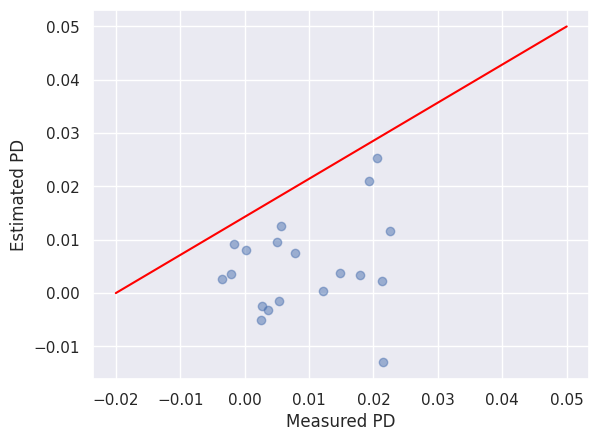

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

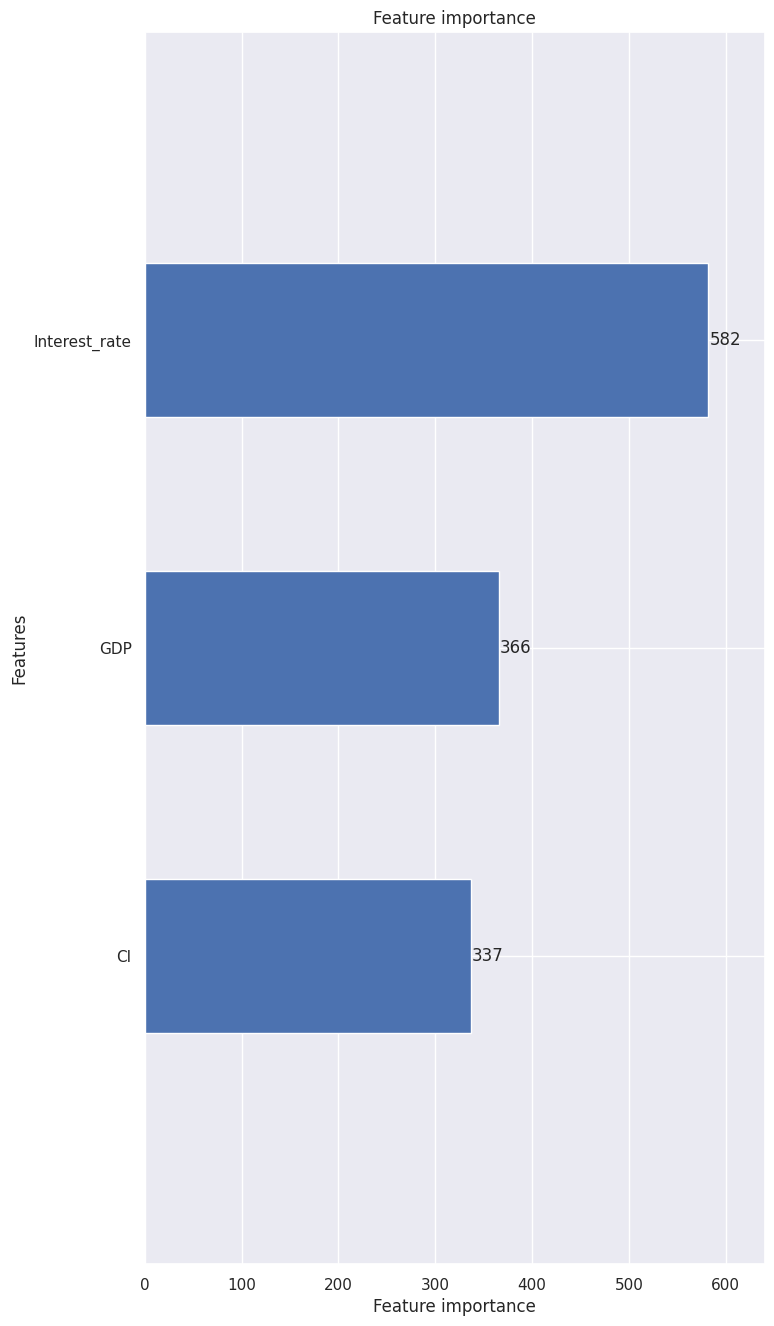

In [81]:
#予測ターゲットの格納（Default：A列）
target_df = df[["Default"]]
#特徴量の格納（説明変数：B列以降）
train_df = df.iloc[:,1:4]

#モデル学習のための、訓練データとテストデータを19:1で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.05)

#lightで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(-0.02, 0.05, 10000), np.linspace(0, 0.05, 10000), "red")
plt.xlabel('Measured PD')
plt.ylabel('Estimated PD')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

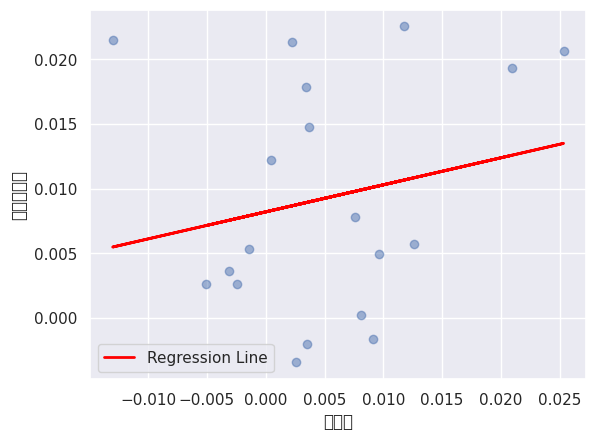

傾き: 0.20924643996078587
切片: 0.008207119415906223


In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 実際の価格と予測値の対応する点
x = np.array(pred).reshape(-1, 1)
y = np.array(y_test).reshape(-1, 1)

# 線形回帰モデルの作成
model = LinearRegression()

# モデルの学習
model.fit(x, y)

# 傾きと切片の取得
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# 予測値を使って回帰直線を描写
plt.scatter(x, y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', linewidth=2, label='Regression Line')
plt.xlabel('予測値')
plt.ylabel('実際の価格')
plt.legend()
plt.show()

print(f"傾き: {slope}")
print(f"切片: {intercept}")


In [83]:
#アドオン
pred2 = pred-intercept
pred3 = pred2/slope
pred = pred3

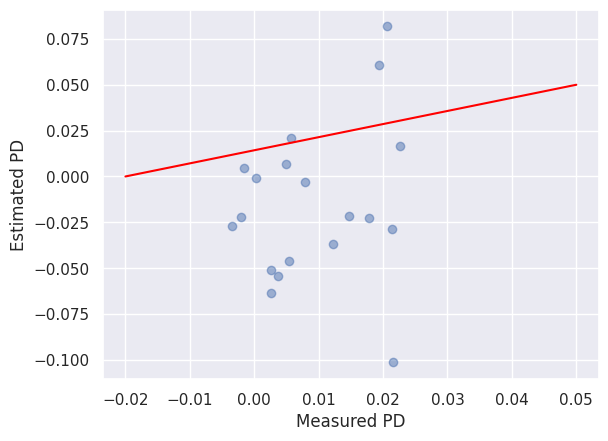

In [84]:
#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(-0.02, 0.05, 10000), np.linspace(0, 0.05, 10000), "red")
plt.xlabel('Measured PD')
plt.ylabel('Estimated PD')
plt.show()


In [ ]:
#アドオン
pred2 = pred-intercept
pred3 = pred2/slope
pred = pred3